# Experiment 2

## Detecting Heart disease from Cardio dataset

Anveshak Rathore

Final Year B.Tech Electronics

181060012

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
path = 'cardio-dataset.csv'
data = pd.read_csv(path)

In [27]:
print("Original Dataset:")
print(data.head(5),"\n")

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,2,48,236,66,0,2,0,1.1
1,1,48,260,51,0,2,1,7.0
2,1,44,187,49,1,2,0,7.0
3,2,42,216,57,1,2,0,0.4
4,2,56,156,42,0,2,0,2.2


### One-Hot Encoding particular columns

In [28]:
data = pd.concat([data, pd.get_dummies(data.SEX, prefix='SEX')], axis=1)
data.drop('SEX', axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data.SMOKE_, prefix='SMOKER')], axis=1)
data.drop('SMOKE_', axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data.BPMED, prefix='BPMEDS')], axis=1)
data.drop('BPMED', axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data.DIAB_01, prefix='DIABETIC')], axis=1)
data.drop('DIAB_01', axis=1, inplace=True)

### Scaling values of some columns from 0-1

In [29]:
data[['TC','HDL']] = MinMaxScaler().fit_transform(data[['TC','HDL']])

In [30]:
print("Processed dataset")
print(data.head(5),"\n")

,AGEIR,TC,HDL,RISK,SEX_1,SEX_2,SMOKER_0,SMOKER_1,BPMEDS_1,BPMEDS_2,DIABETIC_0,DIABETIC_1
0,48,0.400452,0.293478,1.1,0,1,1,0,0,1,1,0
1,48,0.454751,0.211957,7.0,1,0,1,0,0,1,0,1
2,44,0.289593,0.201087,7.0,1,0,0,1,0,1,1,0
3,42,0.355204,0.244565,0.4,0,1,0,1,0,1,1,0
4,56,0.219457,0.163043,2.2,0,1,1,0,0,1,1,0


### Creating X and y variables

In [31]:
X = data.drop('RISK', axis=1)
y = data.RISK

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Creating and predicting on model

In [33]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

### R^2 Score

In [34]:
print("R^2 Score: ", model.score(X_test,y_test))

0.743326170155989

### Mean Squared Error

In [35]:
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))

44.034169569294754

In [36]:
result = pd.DataFrame(list(zip(y_test,y_pred)),columns=['Test values','Predicted values'])

In [53]:
print("Expected vs Predicted values:")
print(result.head(10), "\n")

,Test values,Predicted values
0,56.2,37.704889
1,0.7,-6.559638
2,5.6,10.002983
3,0.5,-5.875086
4,1.7,0.521920
5,2.4,2.760644
6,20.5,24.729571
7,24.0,19.706556
8,30.3,25.916514
9,40.3,37.095041


In [38]:
%matplotlib qt

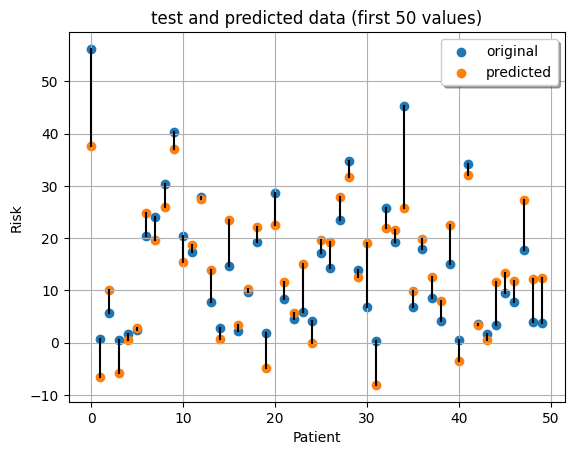

In [55]:
x_ax = range(len(y_test))
y_pred = np.array(y_pred)
y_test = np.array(y_test)
plt.scatter(x_ax[:50], y_test[:50], label="original")
plt.scatter(x_ax[:50], y_pred[:50], label="predicted")
for i in range(50):
    plt.plot([x_ax[i],x_ax[i]],[y_pred[i],y_test[i]],c='black')
plt.title("test and predicted data (first 50 values)")
plt.xlabel('Patient')
plt.ylabel('Risk')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()